**Molecular Classification of Cancer by Gene Expression Monitoring**

In [1]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Anthony Lam

**Course:** CISB 60 – ML and DL (Fall, 2024)

**Problem Statement**
* This project is about trying to classify two different types of cancer (leukemia) from Gene Expression Data. The dataset can be found at: 

https://www.kaggle.com/datasets/crawford/gene-expression/data?select=data_set_ALL_AML_train.csv
    
    
    
* **Keywords:** Acute Myeloid Leukemia, Acute Lymphoblastic Leukemia, Gene Expression
	

**Required packages**

* Add instructions to install the required packages


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset
train_df = pd.read_csv("data/data_set_ALL_AML_train.csv")
test_df = pd.read_csv("data/data_set_ALL_AML_independent.csv")
actual_df = pd.read_csv("data/actual.csv", index_col = 'patient')

In [4]:
train_df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   call                   7129 non-null   object
 4   2                      7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   3                      7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   4                      7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  5                      7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  6                      7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  7                      7129 non-null   int64 
 15  call.6               

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   39                     7129 non-null   int64 
 3   call                   7129 non-null   object
 4   40                     7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   42                     7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   47                     7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  48                     7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  49                     7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  41                     7129 non-null   int64 
 15  call.6               

In [7]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1 to 72
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cancer  72 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB


In [8]:
# count patients with which type of cancer
actual_df['cancer'].value_counts()

cancer
ALL    47
AML    25
Name: count, dtype: int64

In [37]:
y = actual_df.replace({'ALL': 0, 'AML': 1})
y

,cancer
patient,
1,0
2,0
3,0
4,0
5,0
...,...
68,0
69,0
70,0


In [33]:
# remove unneeded columns, and transpose for easier wrangling
train_to_keep=[col for col in train_df.columns if "call" not in col]
test_to_keep=[col for col in test_df.columns if "call" not in col]

X_train = train_df[train_to_keep].T
X_train.columns = X_train.iloc[1]
X_train = X_train.iloc[2:]

X_test = test_df[test_to_keep].T
X_test.columns = X_test.iloc[1]
X_test = X_test.iloc[2:]

In [35]:
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [36]:
X_test.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [39]:
# according to dataset doc, first 38 are training, last 34 are test
y_train = y['cancer'][:38]
y_test = y['cancer'][38:]

In [41]:
# prep feature extraction
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [44]:
X_train_pca.shape

(38, 32)

In [45]:
X_test_pca.shape

(34, 32)

95% of variance explained in 32 components

**Methodology**

1. Explan your ML and DL metodology



2. Introduce the topics you used in your project
 * Model 1
    * Naive Bayes
 
 * Model 2
    * Deep Learning
 

**Your code starts here**

**Machine Learning Section**

In [46]:
from sklearn.naive_bayes import GaussianNB

ml_model = GaussianNB()

ml_model.fit(X_train_pca, y_train)

GaussianNB()

0.6176470588235294
              precision    recall  f1-score   support

           0       0.90      0.62      0.73        29
           1       0.21      0.60      0.32         5

    accuracy                           0.62        34
   macro avg       0.56      0.61      0.53        34
weighted avg       0.80      0.62      0.67        34



<Axes: >

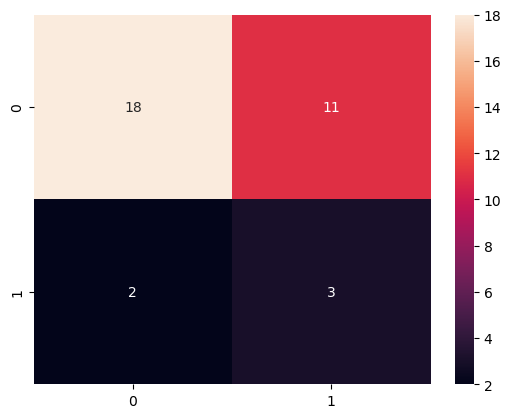

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

ml_prediction = ml_model.predict(X_test_pca)
ml_accuracy = accuracy_score(ml_prediction, y_test)

print(ml_accuracy)
print(classification_report(ml_prediction, y_test))

sns.heatmap(confusion_matrix(ml_prediction, y_test), annot=True)

**Deep Learning Section**

In [94]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

dl_model = Sequential()
dl_model.add(layers.Dense(32, activation='relu', input_shape=X_train_pca[1].shape))
dl_model.add(layers.Dense(16, activation='relu'))
dl_model.add(layers.Dense(1, activation='sigmoid'))

In [95]:
dl_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [97]:
import datetime

# Generate the logs for Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [98]:
dl_model.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    batch_size = 8,
    epochs = 10,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
5/5 [==============================] - 1s 98ms/step - loss: 5.9499 - binary_accuracy: 0.6842 - val_loss: 2.3814 - val_binary_accuracy: 0.5882
Epoch 2/10
5/5 [==============================] - 0s 43ms/step - loss: 5.0527 - binary_accuracy: 0.7105 - val_loss: 1.9399 - val_binary_accuracy: 0.6471
Epoch 3/10
5/5 [==============================] - 0s 41ms/step - loss: 4.1549 - binary_accuracy: 0.6842 - val_loss: 1.5711 - val_binary_accuracy: 0.6471
Epoch 4/10
5/5 [==============================] - 0s 45ms/step - loss: 3.4173 - binary_accuracy: 0.6579 - val_loss: 1.2528 - val_binary_accuracy: 0.6471
Epoch 5/10
5/5 [==============================] - 0s 39ms/step - loss: 2.7403 - binary_accuracy: 0.6579 - val_loss: 1.0283 - val_binary_accuracy: 0.7059
Epoch 6/10
5/5 [==============================] - 0s 39ms/step - loss: 2.0336 - binary_accuracy: 0.6842 - val_loss: 0.8921 - val_binary_accuracy: 0.7059
Epoch 7/10
5/5 [==============================] - 0s 43ms/step - loss: 1.7104 - bi

In [99]:
pred = dl_model.evaluate(X_test_pca, y_test)
pred

2/2 [==============================] - 0s 0s/step - loss: 0.6715 - binary_accuracy: 0.7059


[0.6714609861373901, 0.7058823704719543]

In [100]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

In [101]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

2/2 [==============================] - 0s 0s/step


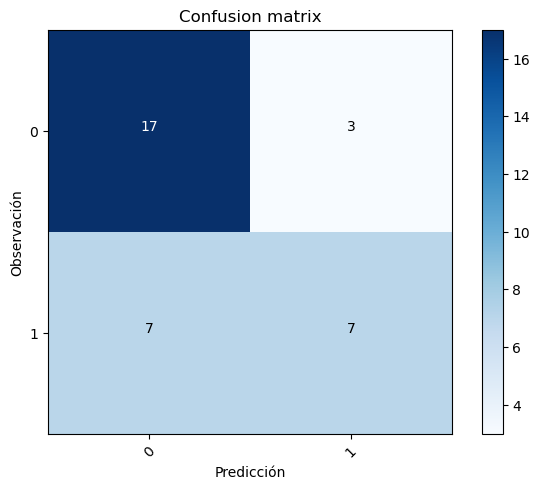

In [115]:
# Predict the values from the validation dataset
y_pred = dl_model.predict(X_test_pca)
# 0.5 Threshold due to sigmoid activation in last layer
y_pred_classes = np.where(y_pred > 0.5, 1, 0) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

**Conclusions**


In [108]:
# It seems like the Neural Network did better in terms of accuracy compared to the Naive Bayes model.
# Though, in both cases, it just seems like it's predominantly picking 0 (ALL) predominantly, and randomly choosing 1
# at random times.
# I am not convinced that these models are any great for actually detecting ALL vs AML in any way shape or form.

**References**
   - Academic (if any)
   - Online (if any)
	

In [ ]:
# None

**Credits**

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

In [6]:
# End of Project